In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [100]:
from sklearn.decomposition import NMF
import pickle

In [6]:
ratings = pd.read_csv('./ml-latest-small/ratings.csv', index_col=1)

In [7]:
ratings.head()

,userId,rating,timestamp
movieId,,,
1,1,4.0,964982703
3,1,4.0,964981247
6,1,4.0,964982224
47,1,5.0,964983815
50,1,5.0,964982931


In [8]:
movie_names = pd.read_csv('./ml-latest-small/movies.csv', index_col=0)

In [9]:
movie_names.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [32]:
movie_names.genres.nunique()

951

In [10]:
ratings.index.nunique(), movie_names.index.nunique()

(9724, 9742)

In [11]:
full_movie_df = pd.merge(ratings, movie_names, left_index=True, right_index=True)

In [12]:
full_movie_df.head()

,userId,rating,timestamp,title,genres
movieId,,,,,
1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,7,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,15,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,17,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [13]:
full_movie_df.drop(['timestamp', 'genres'], inplace=True, axis=1)

In [14]:
full_movie_df.head()

,userId,rating,title
movieId,,,
1,1,4.0,Toy Story (1995)
1,5,4.0,Toy Story (1995)
1,7,4.5,Toy Story (1995)
1,15,2.5,Toy Story (1995)
1,17,4.5,Toy Story (1995)


In [15]:
full_movie_df.reset_index().set_index('userId', inplace=True)

In [16]:
full_movie_df.set_index('userId', inplace=True)

In [17]:
full_movie_df.head()

,rating,title
userId,,
1,4.0,Toy Story (1995)
5,4.0,Toy Story (1995)
7,4.5,Toy Story (1995)
15,2.5,Toy Story (1995)
17,4.5,Toy Story (1995)


In [19]:
full_movie_df.head()

,rating,title
userId,,
1,4.0,Toy Story (1995)
5,4.0,Toy Story (1995)
7,4.5,Toy Story (1995)
15,2.5,Toy Story (1995)
17,4.5,Toy Story (1995)


In [20]:
ratings = pd.pivot_table(full_movie_df, index=full_movie_df.index, columns='title', values='rating')

In [21]:
ratings.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
ratings.isna().sum()

title
'71 (2014)                                   609
'Hellboy': The Seeds of Creation (2004)      609
'Round Midnight (1986)                       608
'Salem's Lot (2004)                          609
'Til There Was You (1997)                    608
                                            ... 
eXistenZ (1999)                              588
xXx (2002)                                   586
xXx: State of the Union (2005)               605
¡Three Amigos! (1986)                        584
À nous la liberté (Freedom for Us) (1931)    609
Length: 9719, dtype: int64

In [23]:
ratings.index.nunique()

610

In [24]:
len(ratings.index)

610

In [25]:
ratings.mean().sort_values(ascending=False)

title
Gena the Crocodile (1969)                  5.0
True Stories (1986)                        5.0
Cosmic Scrat-tastrophe (2015)              5.0
Love and Pigeons (1985)                    5.0
Red Sorghum (Hong gao liang) (1987)        5.0
                                          ... 
Don't Look Now (1973)                      0.5
Journey 2: The Mysterious Island (2012)    0.5
Joe Dirt 2: Beautiful Loser (2015)         0.5
Jesus Christ Vampire Hunter (2001)         0.5
Fullmetal Alchemist 2018 (2017)            0.5
Length: 9719, dtype: float64

In [26]:
ratings.mean(axis=1).sort_values(ascending=False)

userId
53     5.000000
251    4.869565
515    4.846154
25     4.807692
30     4.735294
         ...   
567    2.245455
153    2.217877
508    2.145833
139    2.144330
442    1.275000
Length: 610, dtype: float64

In [27]:
ratings.count(axis=1).sort_values(ascending=False)

userId
414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
442      20
569      20
320      20
576      20
53       20
Length: 610, dtype: int64

In [28]:
user_ratings = ratings.transpose().fillna(round(ratings.mean(axis=1), 1)).transpose().head()

In [29]:
movie_ratings = ratings.fillna(ratings.mean())

In [30]:
user_ratings.head(2)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,4.4,4.4,4.4,4.4,4.4,4.4,4.4,4.4,4.4,4.4,...,4.4,4.4,4.4,4.4,4.4,4.4,4.4,4.4,4.0,4.4
2,3.9,3.9,3.9,3.9,3.9,3.9,3.9,3.9,3.9,3.9,...,3.9,3.9,3.9,3.9,3.9,3.9,3.9,3.9,3.9,3.9


In [31]:
movie_ratings.head(2)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.666667,3.285714,...,1.5,4.0625,3.666667,3.0,3.0,3.863636,2.770833,2.0,4.000000,1.0
2,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.666667,3.285714,...,1.5,4.0625,3.666667,3.0,3.0,3.863636,2.770833,2.0,3.134615,1.0


In [87]:
n_components = 23

In [88]:
nmf= NMF(n_components=n_components)

In [89]:
nmf.fit(user_ratings)

NMF(n_components=23)

In [90]:
nmf.components_

array([[0.33892701, 0.60790613, 0.24593714, ..., 0.44768711, 0.37658826,
        0.44089832],
       [0.03233834, 0.09262215, 0.56548428, ..., 0.02879473, 0.04734741,
        0.18568471],
       [0.59735837, 0.35608546, 0.17380731, ..., 0.25753914, 0.16899939,
        0.38041703],
       ...,
       [0.0770108 , 0.37390263, 0.18974912, ..., 0.20996263, 0.38185171,
        0.06156575],
       [0.44157684, 0.05894454, 0.33362717, ..., 0.29309292, 0.12814813,
        0.20294569],
       [0.38817748, 0.19505404, 0.13581623, ..., 0.22464532, 0.85734542,
        0.19161045]])

In [91]:
Q = pd.DataFrame(nmf.components_, columns=list(user_ratings.columns), 
                 index=[f"cluster_{i+1}" for i in range(n_components)])

In [92]:
Q.head()

,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
cluster_1,0.338927,0.607906,0.245937,0.378399,0.470283,0.273583,0.345129,0.241152,0.595929,0.488088,...,0.329574,0.175103,0.325221,0.330723,0.260814,0.599858,0.358505,0.447687,0.376588,0.440898
cluster_2,0.032338,0.092622,0.565484,0.219912,0.298183,0.036992,0.290200,0.131945,0.064285,0.297018,...,0.501222,0.735235,0.104702,0.123029,0.560144,0.082443,0.177084,0.028795,0.047347,0.185685
cluster_3,0.597358,0.356085,0.173807,0.653434,0.054920,0.206903,0.319549,0.385210,0.088862,0.084415,...,0.349913,0.425041,0.403246,0.349361,0.406723,0.071021,0.454207,0.257539,0.168999,0.380417
cluster_4,0.234089,0.915442,0.882130,0.396924,0.082751,0.007593,0.327004,0.536020,0.272969,0.493266,...,0.258306,0.301592,0.499539,0.321898,0.609789,0.433447,0.547945,0.488521,0.248999,0.310839
cluster_5,0.253689,0.196697,0.213959,0.293644,0.307149,0.309802,0.240359,0.985560,0.309205,0.118604,...,0.104344,0.138044,0.215756,0.313263,0.379172,0.038735,0.188898,0.351866,0.291298,0.055179


In [93]:
P = pd.DataFrame(nmf.transform(user_ratings),
             index=user_ratings.index,
            columns = [f"cluster_{i+1}" for i in range(n_components)])

/Users/abhi/miniconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [94]:
P.head()

,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,...,cluster_14,cluster_15,cluster_16,cluster_17,cluster_18,cluster_19,cluster_20,cluster_21,cluster_22,cluster_23
userId,,,,,,,,,,,,,,,,,,,,,
1,4.610363,1.979026,0.813344,0.130803,0.816678,0.109080,0.525098,0.002791,0.597944,0.520242,...,0.231970,0.223402,0.371666,0.304784,0.320605,0.343010,0.225852,0.163765,0.546580,0.158348
2,3.374919,1.463407,0.597744,0.440260,0.510507,0.017518,0.308746,0.089303,0.450494,0.555627,...,0.220233,0.421094,0.350657,0.092623,0.218598,0.285379,0.141472,0.225089,0.022242,0.692824
3,0.196022,0.000614,0.000006,0.368354,0.008820,0.646558,0.133821,0.000000,0.173394,0.257885,...,0.042727,0.408989,0.148839,0.815337,0.516180,0.482974,0.399446,0.582317,0.644119,0.453806
4,1.887770,0.937929,0.484029,0.498365,0.100549,0.339268,0.640509,0.417894,0.586725,0.171715,...,0.693418,0.336677,0.000000,0.535185,0.185533,0.628547,0.498065,0.001610,0.222968,0.270255
5,2.356176,0.910497,0.570072,0.369850,0.158102,0.271978,0.384645,0.477860,0.533930,0.443518,...,0.565047,0.383176,0.419533,0.544436,0.417574,0.493511,0.028646,0.626557,0.242437,0.267894


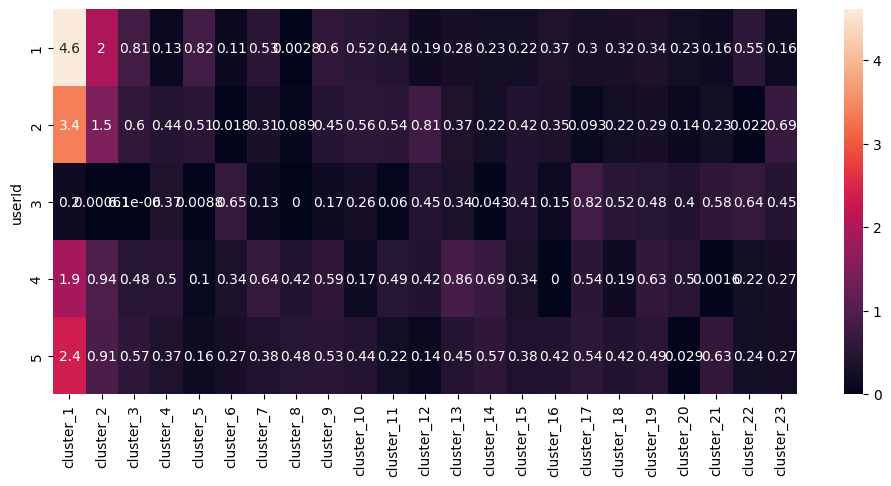

In [95]:
plt.figure(figsize=(12, 5))
sns.heatmap(P, annot=True);

In [96]:
r_hat = pd.DataFrame(np.dot(P, Q), 
             index=user_ratings.index,
            columns=list(user_ratings.columns))

In [97]:
r_hat.head()

,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,4.399813,4.399706,4.398756,4.399960,4.400035,4.399601,4.399626,4.398650,4.398608,4.399886,...,4.399671,4.398755,4.398840,4.399390,4.400309,4.399750,4.398287,4.398894,3.999276,4.398089
2,3.899957,3.899825,3.899262,3.899868,3.900194,3.900282,3.899897,3.898924,3.899530,3.899972,...,3.899302,3.899352,3.899661,3.899830,3.899977,3.900128,3.899050,3.899639,3.900220,3.899276
3,2.399771,2.400067,2.400144,2.400015,2.400053,2.399767,2.400005,2.400210,2.399898,2.400088,...,2.400084,2.399958,2.399778,2.399890,2.400069,2.399911,2.400065,2.399944,2.400291,2.399773
4,3.600111,3.599863,3.599754,3.599934,3.599940,3.600108,3.599877,3.599530,3.599800,3.599898,...,3.599826,3.599758,3.599941,3.599928,3.599909,3.600021,3.599656,3.599863,3.599615,3.599799
5,3.600102,3.599965,3.599981,3.600025,3.599998,3.600068,3.599957,3.599419,3.600084,3.600000,...,3.600017,3.600001,3.600047,3.599931,3.599756,3.600033,3.599936,3.600056,3.600136,3.600240


In [98]:
abs(user_ratings - r_hat)


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000187,0.000294,0.001244,0.000040,0.000035,0.000399,0.000374,0.001350,0.001392,1.140770e-04,...,0.000329,0.001245,0.001160,0.000610,0.000309,0.000250,0.001713,0.001106,0.000724,0.001911
2,0.000043,0.000175,0.000738,0.000132,0.000194,0.000282,0.000103,0.001076,0.000470,2.839560e-05,...,0.000698,0.000648,0.000339,0.000170,0.000023,0.000128,0.000950,0.000361,0.000220,0.000724
3,0.000229,0.000067,0.000144,0.000015,0.000053,0.000233,0.000005,0.000210,0.000102,8.780223e-05,...,0.000084,0.000042,0.000222,0.000110,0.000069,0.000089,0.000065,0.000056,0.000291,0.000227
4,0.000111,0.000137,0.000246,0.000066,0.000060,0.000108,0.000123,0.000470,0.000200,1.023868e-04,...,0.000174,0.000242,0.000059,0.000072,0.000091,0.000021,0.000344,0.000137,0.000385,0.000201
5,0.000102,0.000035,0.000019,0.000025,0.000002,0.000068,0.000043,0.000581,0.000084,1.845915e-07,...,0.000017,0.000001,0.000047,0.000069,0.000244,0.000033,0.000064,0.000056,0.000136,0.000240


In [99]:
nmf.reconstruction_err_

0.2113561173285497

In [101]:
pickle.dump(nmf,open('nmf_users.sav', "wb"))

In [200]:
n_components = 25

In [201]:
nmf= NMF(n_components=n_components)

In [202]:
nmf.fit(movie_ratings)

NMF(n_components=25)

In [203]:
nmf.components_

array([[ 0.98736188,  0.98736188,  0.66427893, ...,  0.        ,
         0.01576545,  0.        ],
       [13.36502039, 13.36502039, 12.07940882, ...,  6.02210529,
         0.        ,  5.34224512],
       [ 6.61888753,  6.61888753,  7.34335845, ...,  0.47891414,
         0.        , 10.11012318],
       ...,
       [ 0.86419279,  0.86419279,  0.71314298, ...,  0.95527055,
         1.65143708,  0.068582  ],
       [ 1.38980679,  1.38980679,  1.05145428, ...,  0.30229591,
         0.8109575 ,  0.14956091],
       [ 3.79329532,  3.79329532,  3.42704185, ...,  2.13106977,
         3.11411047,  1.06147816]])

In [204]:
Q = pd.DataFrame(nmf.components_, columns=list(user_ratings.columns), 
                 index=[f"cluster_{i+1}" for i in range(n_components)])

In [205]:
Q.head()

,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
cluster_1,0.987362,0.987362,0.664279,1.630846,3.176393,0.000000,0.098369,0.339053,2.128609,0.427575,...,0.000000,1.066953,2.356226,0.339053,0.339053,0.340638,0.000000,0.000000,0.015765,0.000000
cluster_2,13.365020,13.365020,12.079409,15.684477,3.044767,6.472095,0.000000,10.682039,0.000000,0.242548,...,6.472095,17.759286,2.259446,10.682039,10.682039,0.000000,0.548491,6.022105,0.000000,5.342245
cluster_3,6.618888,6.618888,7.343358,5.029144,0.000000,9.761674,0.000000,6.573125,3.322695,0.000000,...,9.761674,13.062180,0.000000,6.573125,6.573125,6.725917,0.000000,0.478914,0.000000,10.110123
cluster_4,0.000000,0.000000,0.000000,0.000000,0.000000,2.760188,8.735893,1.108970,0.000000,2.616637,...,2.760188,9.502735,0.000000,1.108970,1.108970,1.039626,2.215324,1.161390,5.235063,1.841576
cluster_5,0.000000,0.000000,0.000000,0.071793,0.000000,0.024547,0.504877,0.028204,3.084303,1.621074,...,0.024547,0.268650,2.016060,0.028204,0.028204,4.801173,0.000000,0.000000,1.076059,0.000000


In [206]:
P = pd.DataFrame(nmf.transform(user_ratings),
             index=user_ratings.index,
            columns = [f"cluster_{i+1}" for i in range(n_components)])

/Users/abhi/miniconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [207]:
P.head()

,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,...,cluster_16,cluster_17,cluster_18,cluster_19,cluster_20,cluster_21,cluster_22,cluster_23,cluster_24,cluster_25
userId,,,,,,,,,,,,,,,,,,,,,
1,0.176039,0.101127,0.056633,0.060946,0.064697,0.004153,0.087096,0.0,0.020847,0.050194,...,0.290618,0.062548,0.0,0.418284,0.000000,0.000000,0.0,0.481281,0.0,0.0
2,0.170839,0.090394,0.049533,0.056346,0.056341,0.003675,0.078987,0.0,0.019308,0.043278,...,0.243783,0.066401,0.0,0.356713,0.000000,0.001571,0.0,0.421961,0.0,0.0
3,0.089918,0.053763,0.029184,0.031535,0.024557,0.002574,0.048484,0.0,0.011384,0.024660,...,0.147302,0.043716,0.0,0.112956,0.000489,0.118761,0.0,0.284830,0.0,0.0
4,0.158665,0.082975,0.044858,0.052913,0.049892,0.003193,0.077438,0.0,0.017652,0.039217,...,0.194942,0.051480,0.0,0.353134,0.000000,0.000000,0.0,0.356672,0.0,0.0
5,0.157530,0.084434,0.046327,0.051823,0.053218,0.003406,0.072626,0.0,0.017766,0.040186,...,0.237769,0.066792,0.0,0.325236,0.000000,0.000000,0.0,0.407924,0.0,0.0


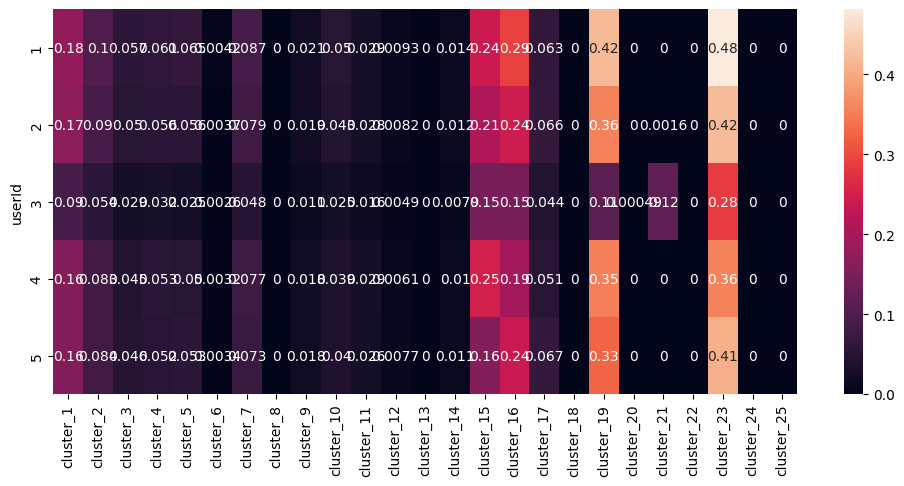

In [208]:
plt.figure(figsize=(12, 5))
sns.heatmap(P, annot=True);

In [209]:
r_hat = pd.DataFrame(np.dot(P, Q), 
             index=user_ratings.index,
            columns=list(user_ratings.columns))

In [210]:
r_hat.head()

,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,4.678156,4.678156,4.234111,5.592696,4.435099,2.360885,4.231231,3.792145,4.833735,4.351405,...,2.360885,5.734187,4.463146,3.792145,3.792145,4.847846,4.215625,2.923119,4.762912,1.869318
2,4.147311,4.147311,3.752946,4.960753,3.911127,2.095098,3.732952,3.364533,4.271674,3.848990,...,2.095098,5.085566,3.940781,3.364533,3.364533,4.287425,3.718723,2.587951,4.227658,1.656718
3,2.560787,2.560787,2.312601,3.072530,2.420837,1.280772,2.270775,2.066447,2.580485,2.347483,...,1.280772,3.113902,2.437857,2.066447,2.066447,2.628967,2.256894,1.582373,2.563544,1.010792
4,3.824837,3.824837,3.461635,4.572902,3.616808,1.935193,3.469344,3.104270,3.903865,3.574430,...,1.935193,4.734956,3.639719,3.104270,3.104270,3.902042,3.414211,2.401802,3.920327,1.527452
5,3.827411,3.827411,3.464233,4.576515,3.612089,1.936339,3.439790,3.105384,3.950136,3.554211,...,1.936339,4.700063,3.641735,3.105384,3.105384,3.958618,3.435658,2.392444,3.898092,1.534391


In [211]:
abs(user_ratings - r_hat)


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.278156,0.278156,0.165889,1.192696,0.035099,2.039115,0.168769,0.607855,0.433735,0.048595,...,2.039115,1.334187,0.063146,0.607855,0.607855,0.447846,0.184375,1.476881,0.762912,2.530682
2,0.247311,0.247311,0.147054,1.060753,0.011127,1.804902,0.167048,0.535467,0.371674,0.051010,...,1.804902,1.185566,0.040781,0.535467,0.535467,0.387425,0.181277,1.312049,0.327658,2.243282
3,0.160787,0.160787,0.087399,0.672530,0.020837,1.119228,0.129225,0.333553,0.180485,0.052517,...,1.119228,0.713902,0.037857,0.333553,0.333553,0.228967,0.143106,0.817627,0.163544,1.389208
4,0.224837,0.224837,0.138365,0.972902,0.016808,1.664807,0.130656,0.495730,0.303865,0.025570,...,1.664807,1.134956,0.039719,0.495730,0.495730,0.302042,0.185789,1.198198,0.320327,2.072548
5,0.227411,0.227411,0.135767,0.976515,0.012089,1.663661,0.160210,0.494616,0.350136,0.045789,...,1.663661,1.100063,0.041735,0.494616,0.494616,0.358618,0.164342,1.207556,0.298092,2.065609


In [212]:
nmf.reconstruction_err_

266.9446232471472

In [213]:
pickle.dump(nmf,open('nmf_moviemean.sav', "wb"))